In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(451, 3)


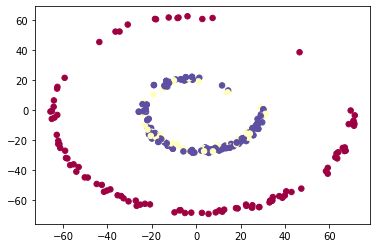

In [2]:
data=np.genfromtxt("traingroup11.csv",delimiter=',',skip_header=1)
print(data.shape)
c0=data[data[:,2]==0.0]
c1=data[data[:,2]==1.0]
c2=data[data[:,2]==2.0]
data1=np.zeros((0,3))
for i in range(451):
    if i%3==0:
        data1=np.append(data1,c0[int(i/3)].reshape(1,3),axis=0)
    elif i&3==1:
        data1=np.append(data1,c1[int(i/3)].reshape(1,3),axis=0)
    else:
        data1=np.append(data1,c2[int(i/3)].reshape(1,3),axis=0)
test=data1[301:,:]
train=data1[0:300,:]
X_train = train[:, :2]
Y_train = train[:, 2]
X_train1=X_train
Y_train1=Y_train
expected_out=Y_train


plt.scatter(X_train1[:,0],X_train1[:,1], c=Y_train1, s=30, cmap=plt.cm.Spectral);


l1_nodes=8
l2_nodes=5

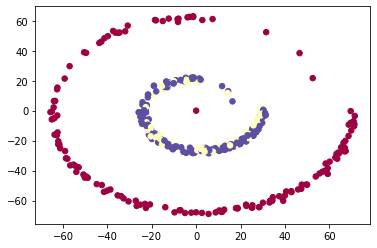

In [3]:
plt.scatter(data1[:,0],data1[:,1], c=data1[:,2], s=30, cmap=plt.cm.Spectral);

In [4]:
X_val = test[:, :2]
Y_val = test[:, 2]
expected_out1=Y_val

In [5]:
X_train=X_train.T
Y_train=Y_train.T
Y_train.shape
a=Y_train

Y_train=Y_train.astype(int)

In [6]:
b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train=b

In [7]:
def relu(X):
    return np.maximum(0,X)
import math

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
# def initparameters():

#     W1 = np.random.randn(l1_nodes,2) * np.sqrt(2/l1_nodes)
#     b1 = np.zeros(shape=(l1_nodes, 1))
#     W2 = np.random.randn(l2_nodes, l1_nodes) * np.sqrt(2/l2_nodes)
#     b2 = np.zeros(shape=(l2_nodes, 1))
#     W3 = np.random.randn(3, l2_nodes) * np.sqrt(2/3)
#     b3 = np.zeros(shape=(3, 1))
    
#     parameters = {"W1": W1,
#                   "b1": b1,
#                   "W2": W2,
#                   "b2": b2,
#                   "W3": W3,
#                   "b3": b3}
    
#     return parameters

# # GRADED FUNCTION: compute_cost

# def compute_cost(A3, Y, parameters):
    
    
#     cost = (-1/300)*np.sum(np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3)))
#     return cost


# def backward_propagation(parameters, cache, X, Y):
   
#     m=300 
   
#     W1 = parameters['W1']
#     W2 = parameters['W2']
#     W3 = parameters['W3']
        
    
#     A1 = cache['A1']
#     A2 = cache['A2']
#     A3 = cache['A3']
    
    
#     dZ3 = A3 - Y
#     dW3 = (1 / m) * np.dot(dZ3, A2.T)
#     db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
#     dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
#     dW2 = (1 / m) * np.dot(dZ2, A1.T)
#     db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
#     dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
#     dW1 = (1 / m) * np.dot(dZ1, X.T)
#     db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
#     ### END CODE HERE ###
    
#     grads = {"dW1": dW1,
#              "db1": db1,
#              "dW2": dW2,
#              "db2": db2,
#              "dW3": dW3,
#              "db3": db3
#             }
    
#     return grads



# def update_parameters(parameters, grads, learning_rate = 0.005):
    
    
#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
#     W3 = parameters['W3']
#     b3 = parameters['b3']
#     ### END CODE HERE ###
    
#     # Retrieve each gradient from the dictionary "grads"
#     ### START CODE HERE ### (≈ 4 lines of code)
#     dW1 = grads['dW1']
#     db1 = grads['db1']
#     dW2 = grads['dW2']
#     db2 = grads['db2']
#     dW3 = grads['dW3']
#     db3 = grads['db3']
#     ## END CODE HERE ###
    
#     # Update rule for each parameter
#     ### START CODE HERE ### (≈ 4 lines of code)
#     W1 = W1 - learning_rate * dW1
#     b1 = b1 - learning_rate * db1
#     W2 = W2 - learning_rate * dW2
#     b2 = b2 - learning_rate * db2
#     W3 = W3 - learning_rate * dW3
#     b3 = b3 - learning_rate * db3
#     ### END CODE HERE ###
    
#     parameters = {"W1": W1,
#                   "b1": b1,
#                   "W2": W2,
#                   "b2": b2,
#                   "W3": W3,
#                   "b3": b3
#                  }
    
#     return parameters

# def forward_propagation(X, parameters):
    
#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
#     W3 = parameters['W3']
#     b3 = parameters['b3']
   
    
    
#     Z1 = np.dot(W1, X) + b1
#     A1 = np.tanh(Z1)
    
#     Z2 = np.dot(W2, A1) + b2
#     A2 = np.tanh(Z2)
    
#     Z3 = np.dot(W3, A2) + b3
#     A3 = sigmoid(Z3)
    
   
    
#     cache = {"Z1": Z1,
#              "A1": A1,
#              "Z2": Z2,
#              "A2": A2,
#              "A3": A3,
#              "Z3 ":Z3}
    
#     return A3, cache


In [10]:


# GRADED FUNCTION: nn_model

def nn_model(X, Y,  num_iterations = 10000, print_cost=False,learning_rate = 0.005):
    req_params=[]
    
    vW1 = np.zeros_like(parameters['W1'])
    vb1 = np.zeros_like(parameters['b1'])
    vW2 = np.zeros_like(parameters['W2'])
    vb2= np.zeros_like(parameters['b2'])
    vW3 = np.zeros_like(parameters['W3'])
    vb3= np.zeros_like(parameters['b3'])
                       
                       
    W1 = np.random.randn(l1_nodes,2) * np.sqrt(2/l1_nodes)
    b1 = np.zeros(shape=(l1_nodes, 1))
    W2 = np.random.randn(l2_nodes, l1_nodes) * np.sqrt(2/l2_nodes)
    b2 = np.zeros(shape=(l2_nodes, 1))
    W3 = np.random.randn(3, l2_nodes) * np.sqrt(2/3)
    b3 = np.zeros(shape=(3, 1))
    ### END CODE HERE ###
    # Loop (gradient descent)
    costs=[]
    for i in range(0, num_iterations):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = np.tanh(Z2)

        Z3 = np.dot(W3, A2) + b3
        A3 = sigmoid(Z3)
        
        
        m=300
        
        
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = cost = (-1/m)*np.sum(np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3)))
        if i % 100 == 0:
            costs.append(cost)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        dZ3 = A3 - Y
        dW3 = (1 / m) * np.dot(dZ3, A2.T)
        db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
        dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    
    
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3
        
        
        if(i%1000==0):
            print("cost ",cost)
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
                 }
        if (i==1 or i==2 or i==10 or i==50 or i==60000-1):
            req_params+=[parameters]
    return parameters,costs,req_params




In [11]:
parameters,costs,req_params = nn_model(X_train, Y_train.T,  num_iterations = 60000, print_cost=True)

cost  2.4151414286735653
cost  1.7785041249968725
cost  1.749750675769129
cost  1.6060177752418152
cost  1.5095390844222396
cost  1.3521230812121838
cost  1.2231461823153154
cost  1.288354008136283
cost  1.0586455189543844
cost  0.9686396255394368
cost  0.914825492106149
cost  0.8761955867398036
cost  0.843532435919946
cost  0.8181484988629562
cost  0.7996990263607981
cost  0.7865793383110485
cost  0.777007504165825
cost  0.7697586262619772
cost  0.764072736123788
cost  0.7594753317864849
cost  0.755660152132639
cost  0.7524225954170274
cost  0.7496218683763693
cost  0.7471583698906267
cost  0.7449597427422786
cost  0.7429722310288678
cost  0.7411551386728984
cost  0.7394771386707131
cost  0.7379137525619829
cost  0.7364455959234926
cost  0.7350571369675464
cost  0.7337358055090247
cost  0.7324713450309462
cost  0.7312553353657463
cost  0.7300808359038075
cost  0.7289421142516717
cost  0.7303120351430141
cost  0.7296776189418004
cost  0.7289919489376919
cost  0.7282795292970557
cost  0

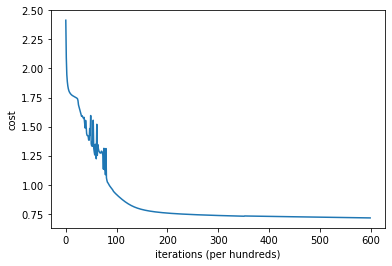

In [12]:

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')

plt.show()



In [13]:
def predict(parameters, X):  

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    predictions = np.argmax(A3,axis=0)
    
    return predictions



In [14]:
pred=predict(parameters, X_train)
count=0
count1=0
pred1=predict(parameters,X_val.T)
i=0
j=0
while i<300:
    if(pred[i]==expected_out[i]):
        count=count+1
    i=i+1
while j<150:
    if(pred1[j]==expected_out1[j]):
        count1=count1+1
    j=j+1
print("train accuracy =",count/301)
print("test accuracy =",count1/150)

train accuracy = 0.8372093023255814
test accuracy = 0.76


In [15]:

# def plot_decision_boundary(parameters, X):
#     # Set min and max values and give it some padding
#     x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
#     y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
#     h = 0.1
#     # Generate a grid of points with distance h between them
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     # Predict the function value for the whole grid
#     Z = (np.c_[xx.ravel(), yy.ravel()])
#     Z = (np.c_[xx.ravel(), yy.ravel()])
#     pred=predict(parameters, Z.T)
#     pred=pred.reshape(xx.shape)
#     plt.ylabel('x2')
#     plt.xlabel('x1')
#     plt.scatter(xx, yy, c=pred, cmap=plt.cm.Spectral)
#     plt.scatter(c0[0:105,0],c0[0:105,1] , s=30)
#     plt.scatter(c1[0:105,0],c1[0:105,1] , s=30)
#     plt.scatter(c2[0:105,0],c2[0:105,1] , s=30)
    
# plot_decision_boundary(parameters, X_train)   

In [31]:

def last_layer(j,params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x3[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
def first_layer(j,params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x1[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
def second_layer(j,params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x2[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
          

In [35]:
def print_every_layer_node_outputs(p,i):
    
    print("first layer 8 nodes-")
    if(i==0):
        print("1")
    elif(i==1):
        print("2")
    elif(i==2):
        print("10")
    elif(i==3):
        print("50")
    elif(i==4):
        print("end")
    print (" iterations")
    first_layer(0,p)
    first_layer(1,p)
    first_layer(2,p)
    first_layer(3,p)
    first_layer(4,p)
    first_layer(5,p)
    first_layer(6,p)
    first_layer(7,p)
    print("second layer 5 nodes-")
    if(i==0):
        print("1")
    elif(i==1):
        print("2")
    elif(i==2):
        print("10")
    elif(i==3):
        print("50")
    elif(i==4):
        print("end")
    second_layer(0,p)
    second_layer(1,p)
    second_layer(2,p)
    second_layer(3,p)
    second_layer(4,p)
    print("last layer 3 nodes-")
    if(i==0):
        print("1")
    elif(i==1):
        print("2")
    elif(i==2):
        print("10")
    elif(i==3):
        print("50")
    elif(i==4):
        print("end")
    last_layer(0,p)
    last_layer(1,p)
    last_layer(2,p)

In [36]:
def print_all_required_images():
    for i in range(len(req_params)): 
        
        print_every_layer_node_outputs(req_params[i],i)

first layer 8 nodes-
1
 iterations


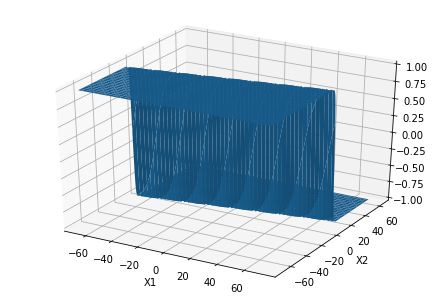

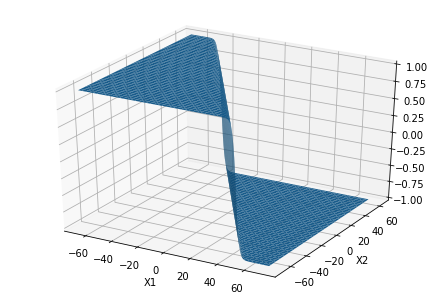

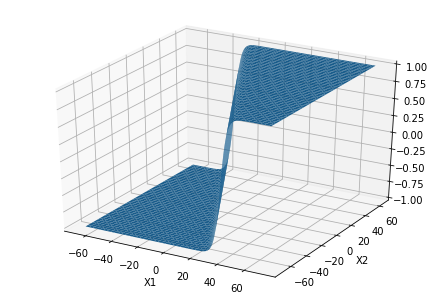

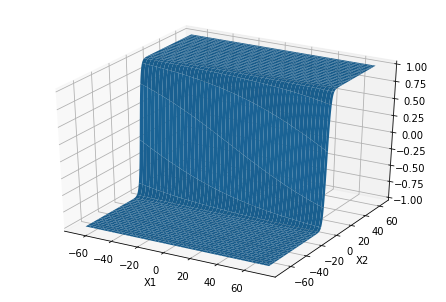

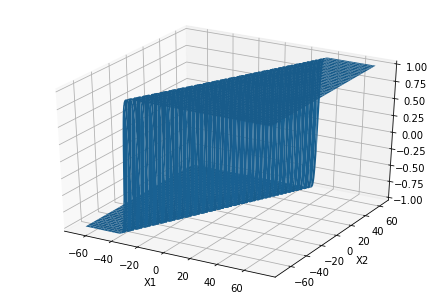

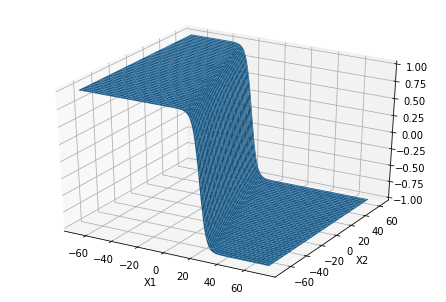

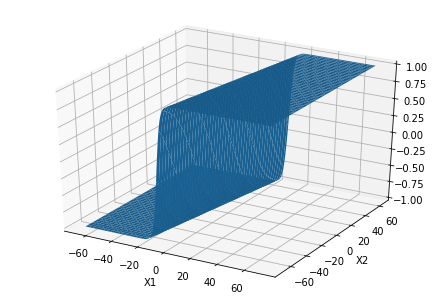

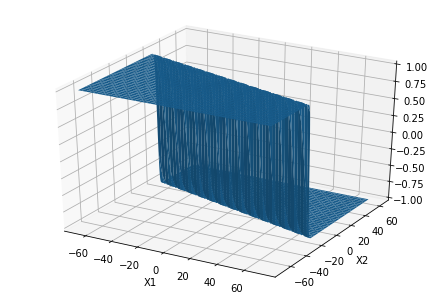

second layer 5 nodes-
1


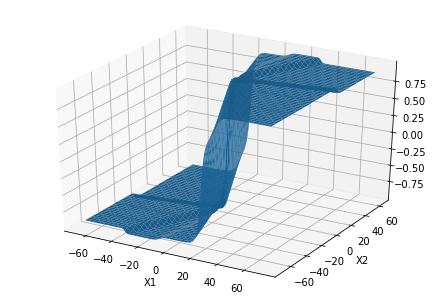

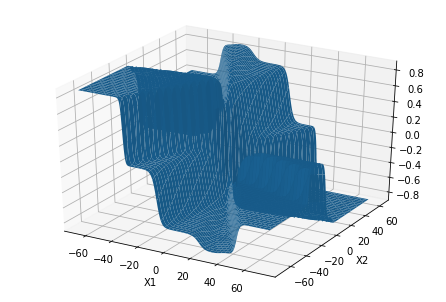

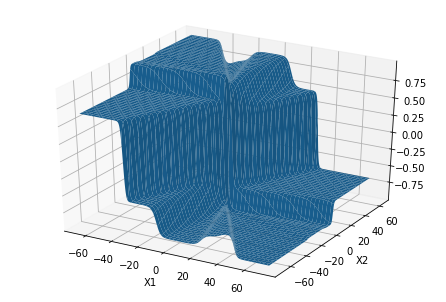

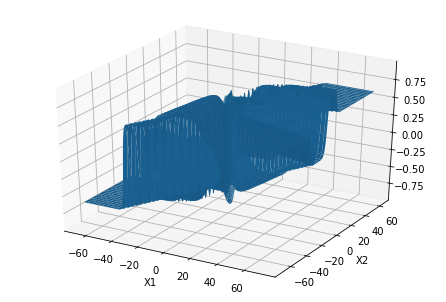

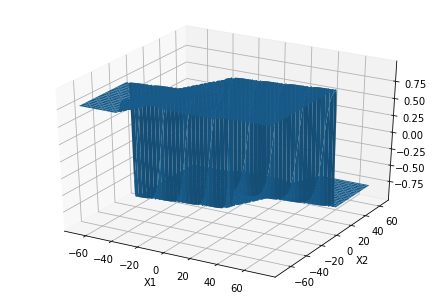

last layer 3 nodes-
1


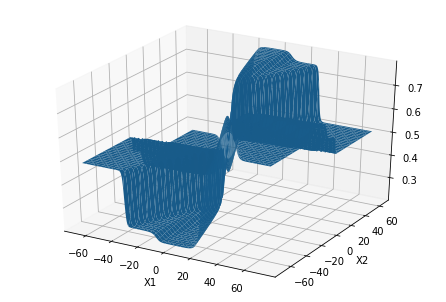

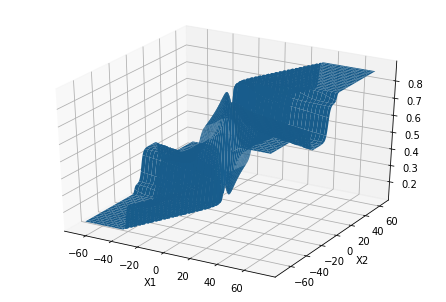

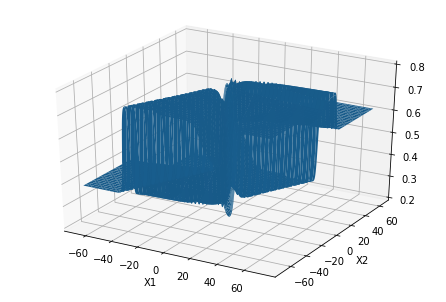

first layer 8 nodes-
2
 iterations


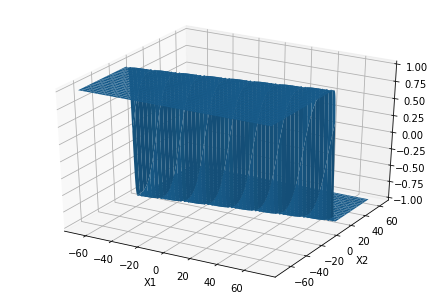

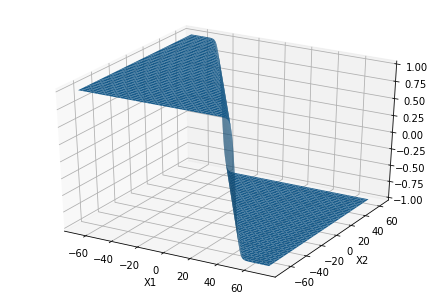

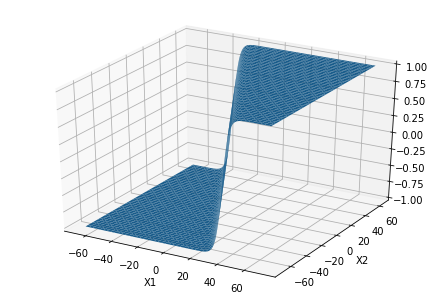

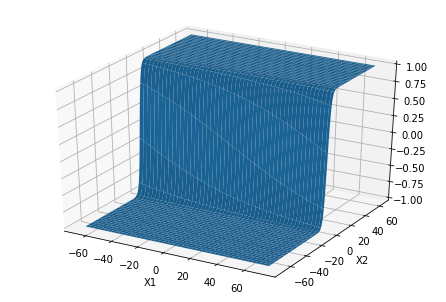

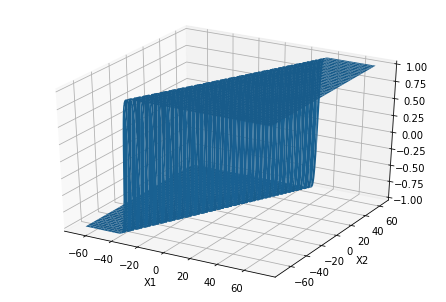

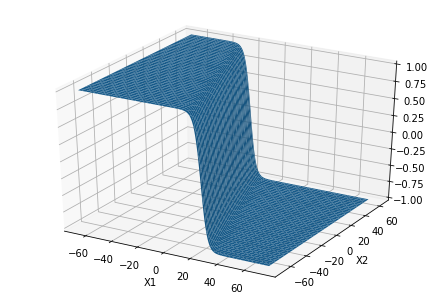

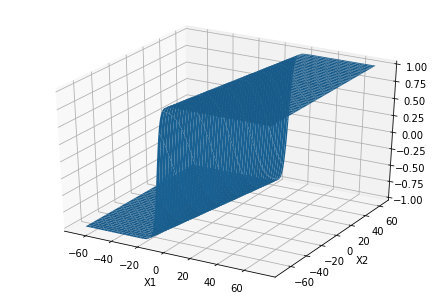

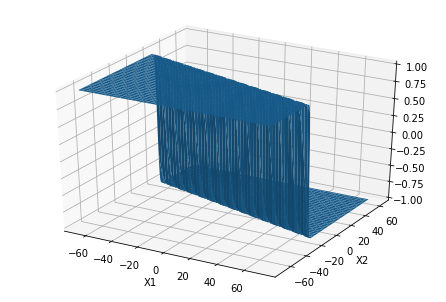

second layer 5 nodes-
2


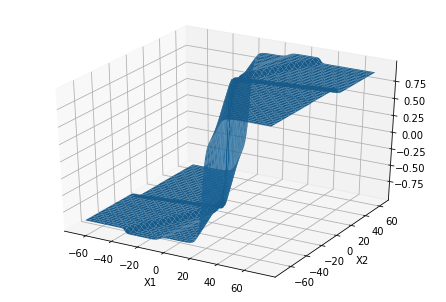

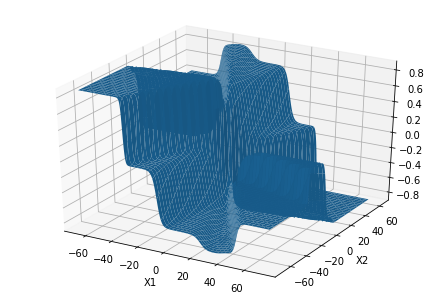

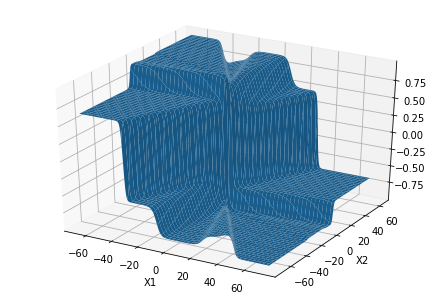

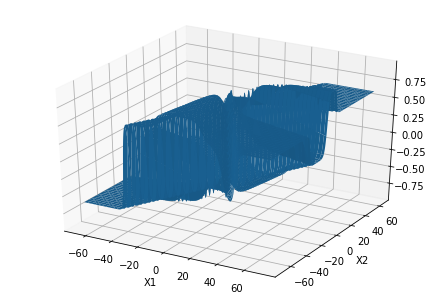

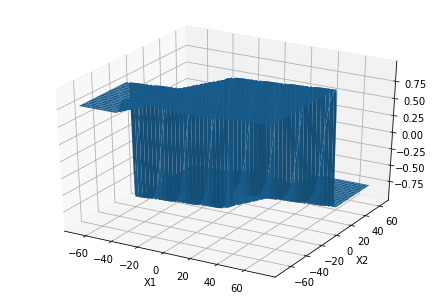

last layer 3 nodes-
2


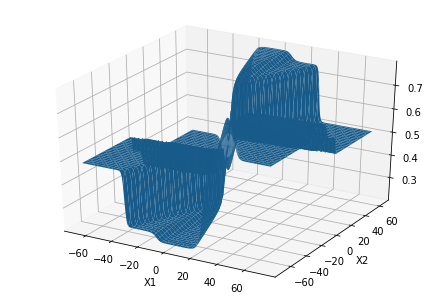

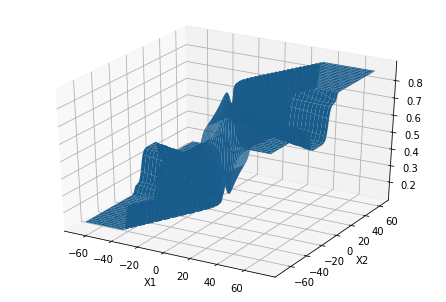

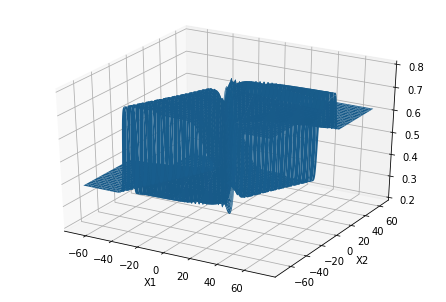

first layer 8 nodes-
10
 iterations


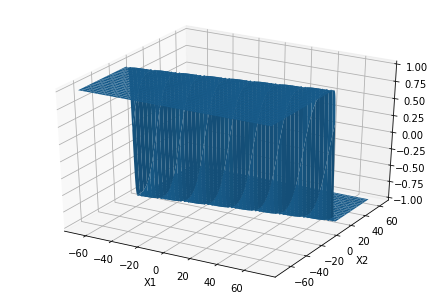

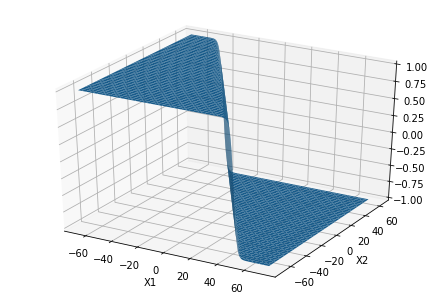

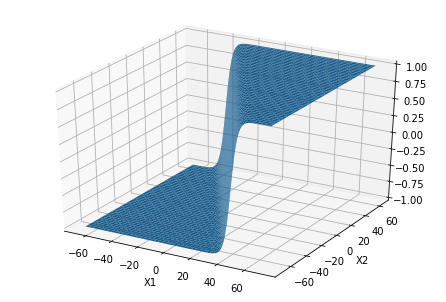

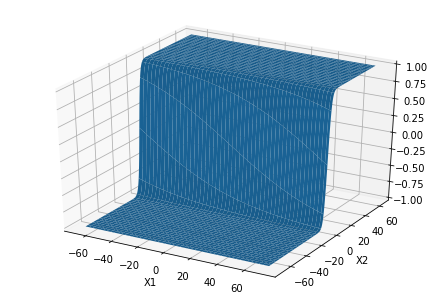

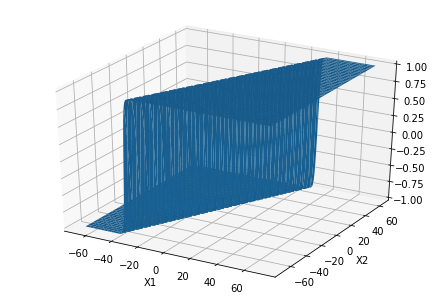

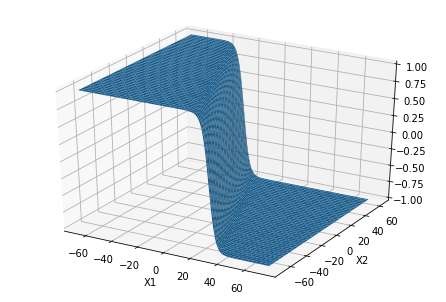

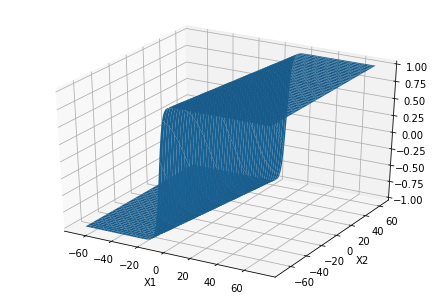

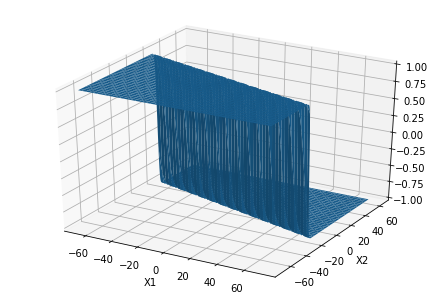

second layer 5 nodes-
10


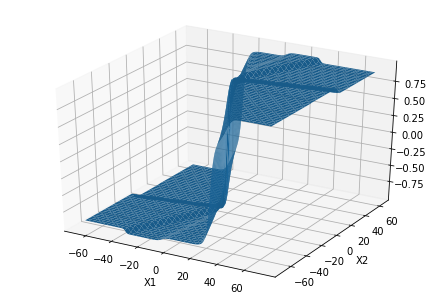

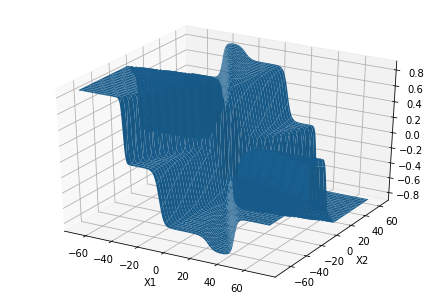

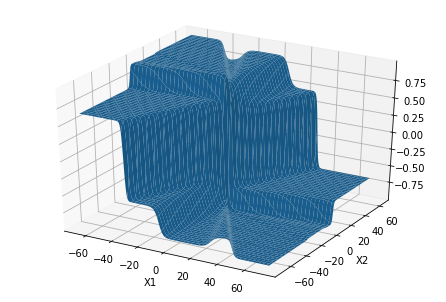

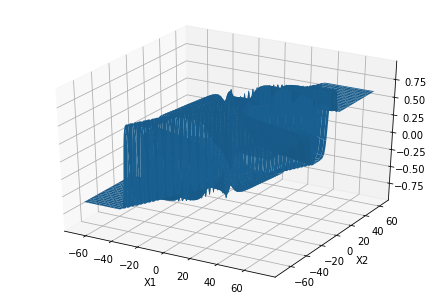

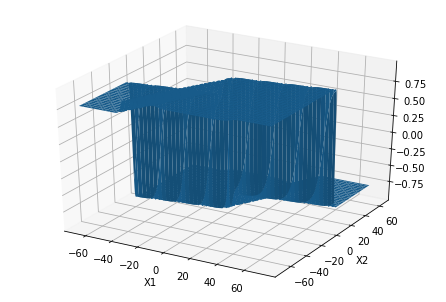

last layer 3 nodes-
10


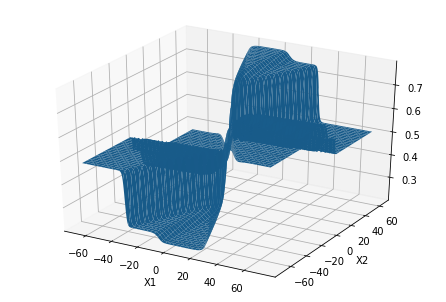

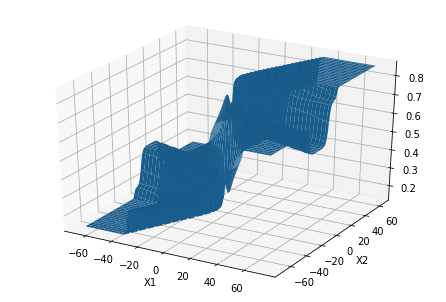

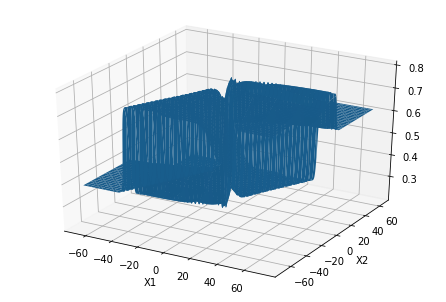

first layer 8 nodes-
50
 iterations


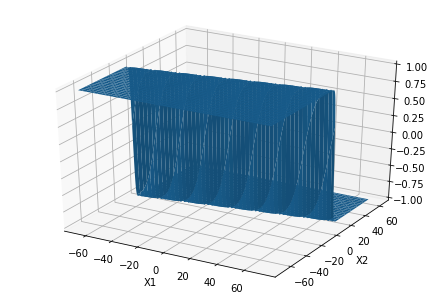

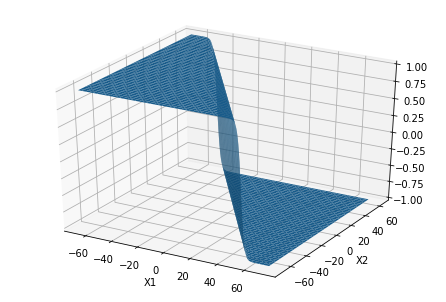

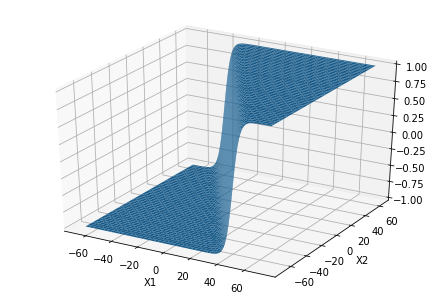

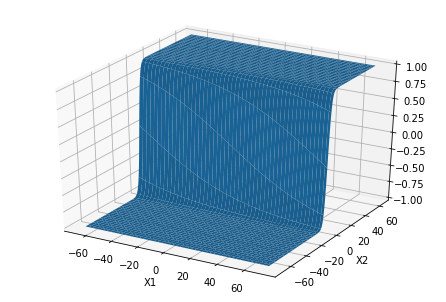

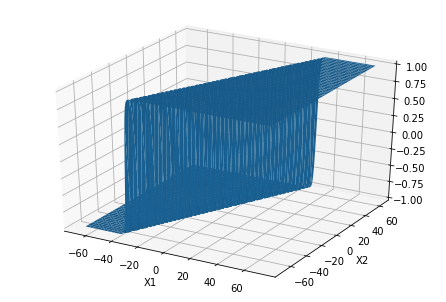

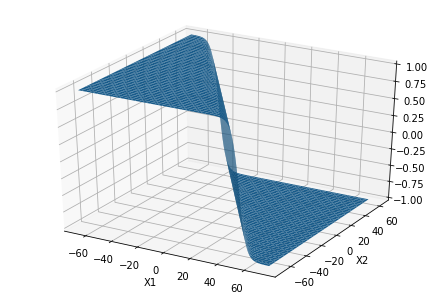

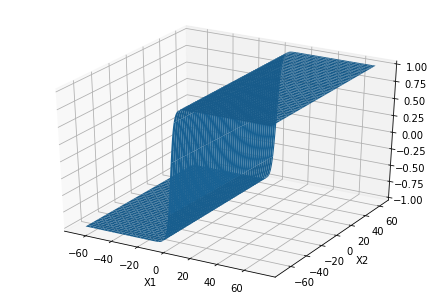

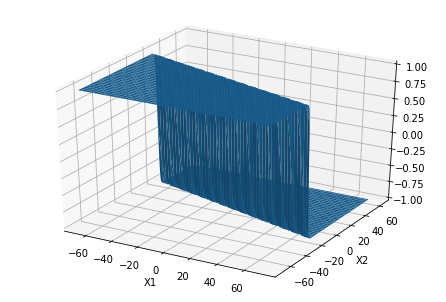

second layer 5 nodes-
50


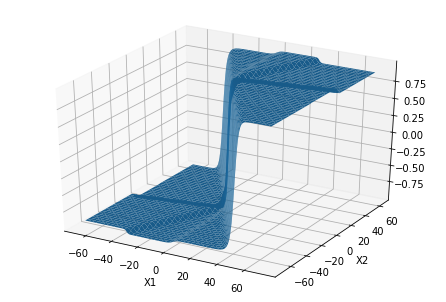

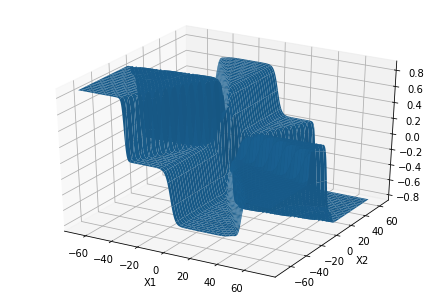

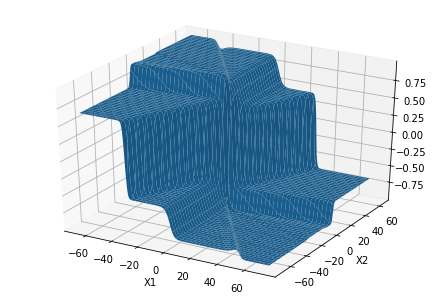

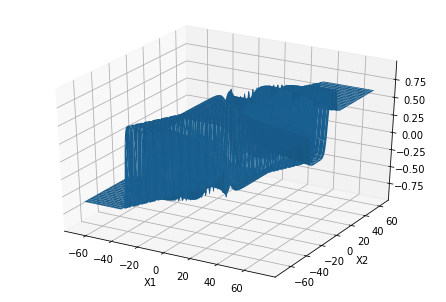

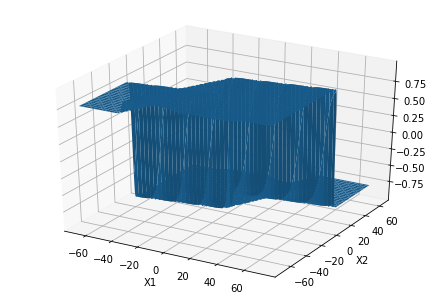

last layer 3 nodes-
50


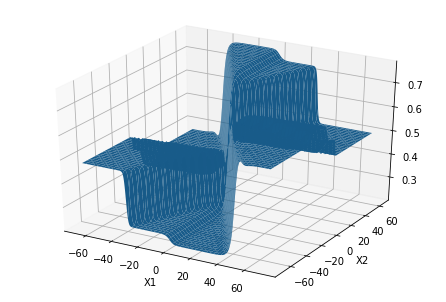

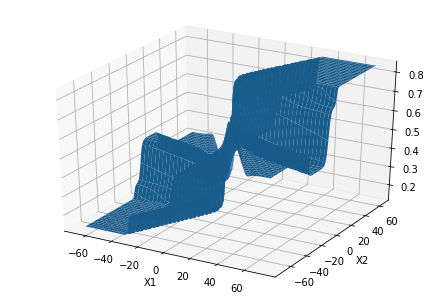

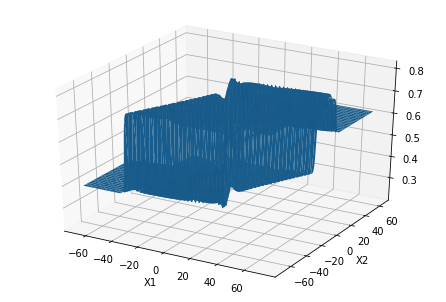

first layer 8 nodes-
end
 iterations


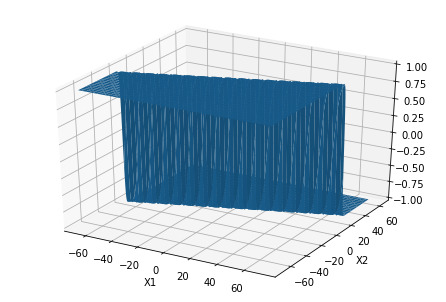

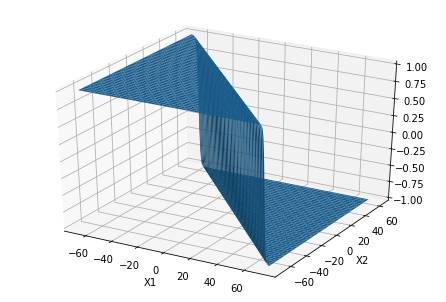

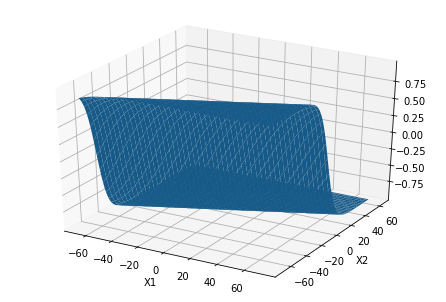

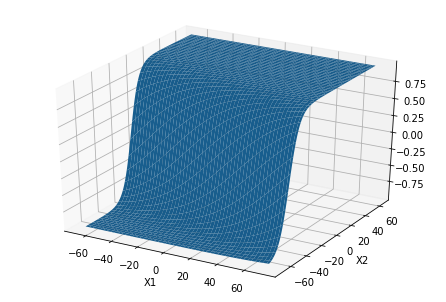

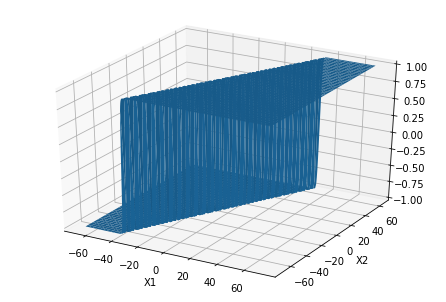

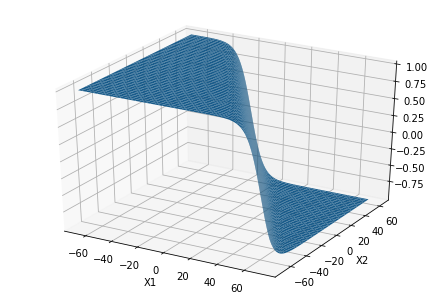

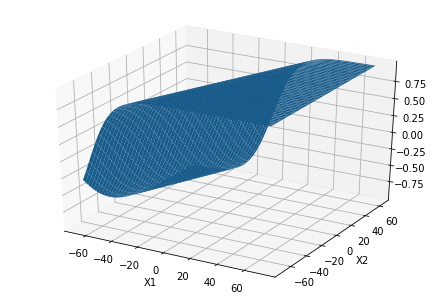

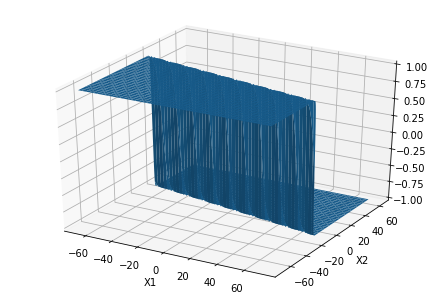

second layer 5 nodes-
end


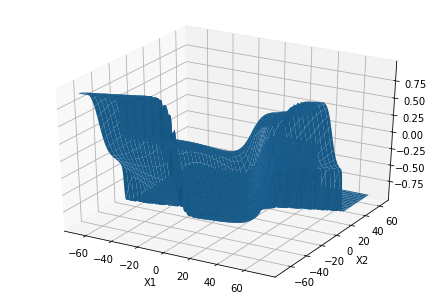

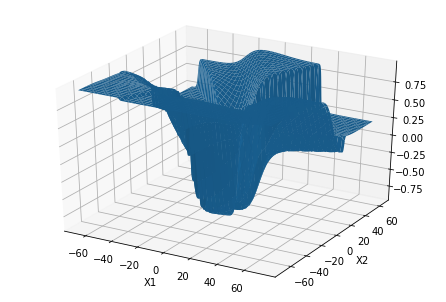

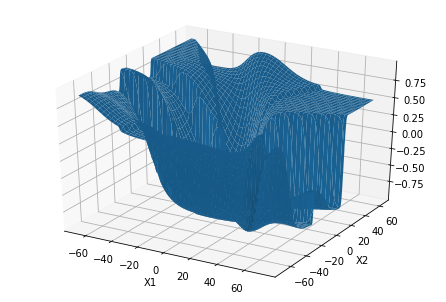

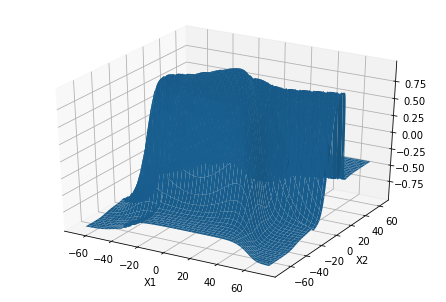

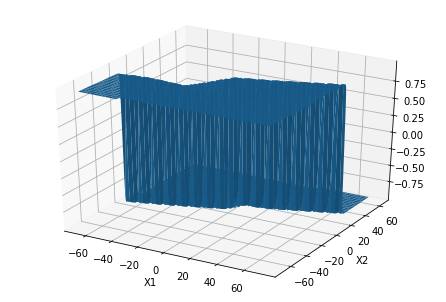

last layer 3 nodes-
end


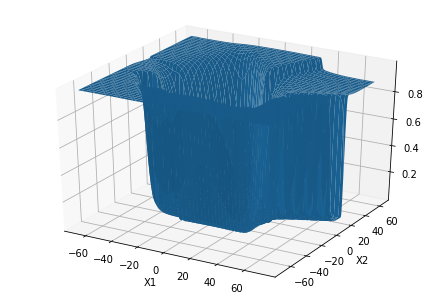

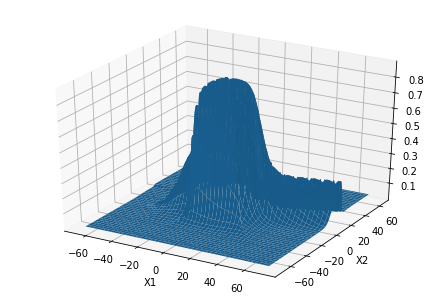

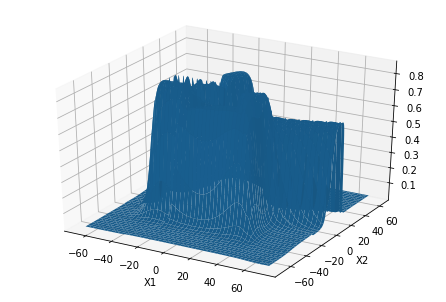

In [37]:
print_all_required_images()